In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv('train.csv')

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df = df.select_dtypes(exclude=['object'])

In [55]:
df = df.fillna(df.median(),inplace=True)

In [56]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [57]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [58]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [59]:
mdsp = np.mean(df['SalePrice'])
dvsp = np.std(df['SalePrice'])
df = df[df['SalePrice'] <= mdsp+2*dvsp]
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,733.273443,57.483894,69.024338,10150.000000,5.980673,5.591983,1970.036507,1984.033644,89.330709,417.371510,47.546886,558.771654,1023.690050,1131.799571,335.507516,5.698640,1473.005727,0.410165,0.058697,1.539012,0.370079,2.861131,1.048676,6.415175,0.582677,1977.575519,1.716535,458.272011,89.635648,44.712956,22.410165,3.236220,14.654975,2.486042,45.450251,6.309234,2007.819613,169994.088046
std,422.610678,42.834148,21.520151,8328.996257,1.280915,1.118812,30.007892,20.664974,158.388068,428.452461,162.755064,428.814136,406.991841,357.341291,420.935647,47.326021,479.451123,0.514806,0.241157,0.536039,0.500479,0.806074,0.225028,1.545211,0.632059,23.901111,0.721025,203.730665,121.847895,65.573915,61.492644,28.583263,54.788508,38.316984,507.106304,2.701004,1.328156,58922.718767
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.000000,20.000000,60.000000,7438.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,218.000000,788.000000,869.000000,0.000000,0.000000,1118.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,69.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,0.000000,474.000000,972.000000,1068.000000,0.000000,0.000000,1437.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,470.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.000000,70.000000,78.000000,11316.000000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,0.000000,806.000000,1249.000000,1344.000000,720.000000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,572.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,6110.000000,4692.000000,1818.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,339750.000000


In [60]:
df.SalePrice.describe()

count      1397.000000
mean     169994.088046
std       58922.718767
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203000.000000
max      339750.000000
Name: SalePrice, dtype: float64

In [61]:
df.LotArea.describe()

count      1397.000000
mean      10150.000000
std        8328.996257
min        1300.000000
25%        7438.000000
50%        9317.000000
75%       11316.000000
max      164660.000000
Name: LotArea, dtype: float64

In [62]:
mdl = np.mean(df['LotArea'])
dvl = np.std(df['LotArea'])
df = df[df['LotArea'] <= mdl+2*dvl]
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,733.372549,57.469136,68.562818,9461.343500,5.978214,5.594771,1970.094408,1984.047204,88.094408,407.662309,46.561365,560.705882,1014.929557,1122.413943,335.212055,5.781409,1463.407407,0.403776,0.057371,1.535221,0.371097,2.857662,1.048656,6.401598,0.569354,1977.706609,1.709513,455.653595,87.732026,43.962963,22.554103,3.283224,14.386347,2.173566,45.238925,6.319535,2007.822077,169303.716049
std,423.072175,42.577349,19.380838,3738.805464,1.275708,1.117996,30.108497,20.680254,155.917865,400.321168,160.180297,429.927301,378.534496,336.764561,419.830808,47.663696,458.363295,0.511141,0.238801,0.532751,0.500994,0.806091,0.225129,1.533283,0.619233,23.913353,0.721254,200.965840,119.625136,64.213732,61.694756,28.787558,54.286495,36.381812,510.299874,2.693042,1.330383,58835.284361
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.000000,20.000000,60.000000,7406.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,219.000000,784.000000,866.000000,0.000000,0.000000,1116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128500.000000
50%,740.000000,50.000000,69.000000,9247.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,361.000000,0.000000,480.000000,970.000000,1062.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,468.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158000.000000
75%,1098.000000,70.000000,78.000000,11228.000000,7.000000,6.000000,1999.000000,2003.000000,140.000000,680.000000,0.000000,806.000000,1241.000000,1337.000000,720.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,572.000000,160.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,201800.000000
max,1460.000000,190.000000,182.000000,26178.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1880.000000,1474.000000,2042.000000,3206.000000,2898.000000,1818.000000,528.000000,3493.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,339750.000000


In [63]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


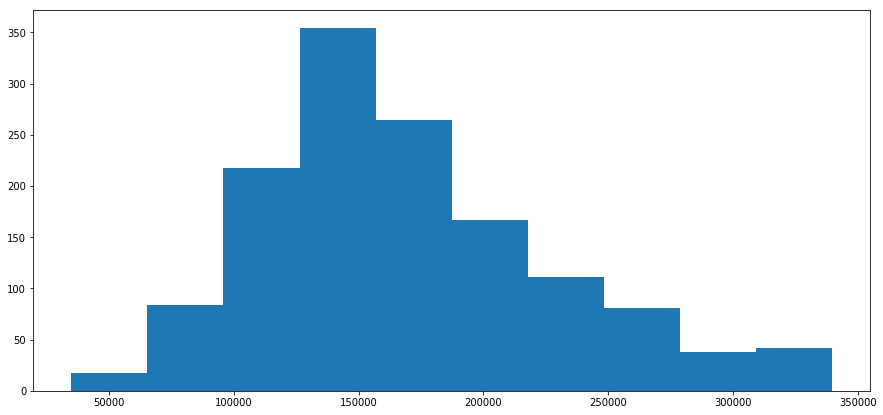

In [64]:
plt.rcParams['figure.figsize'] = [15,7]
plt.hist(df['SalePrice'])
plt.show()

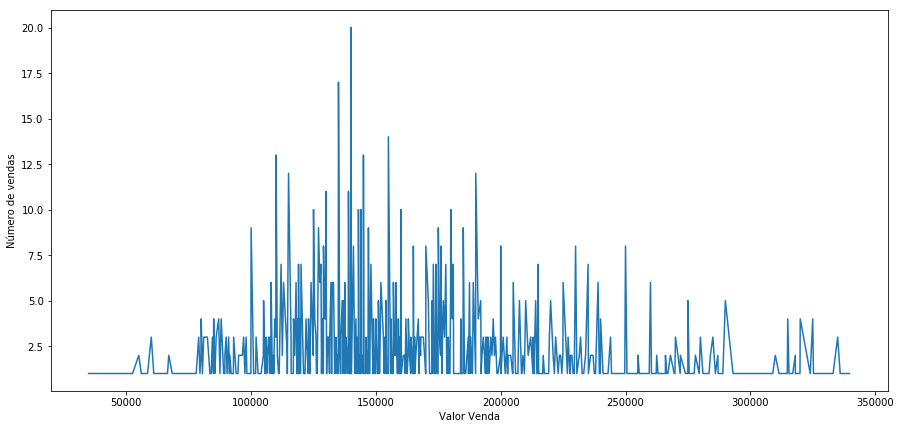

In [65]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(df.groupby('SalePrice').count()[['Id']])
plt.xlabel('Valor Venda')
plt.ylabel('Número de vendas')
plt.show()

In [66]:
X = df.drop('SalePrice',axis=1)
y = df.SalePrice

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1313)

In [24]:
'''
scala = StandardScaler()
scala.fit(X_train)
X_train = scala.transform(X_train)
X_test = scala.transform(X_test)
'''

In [68]:
modelrf = RandomForestRegressor()
modelrf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
model = modelrf.fit(X_train,y_train)

In [70]:
kfold = model_selection.KFold(n_splits=10,random_state=12)
scoring = 'r2'
sc1 = cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
sc1.mean()

0.84714920813986827

In [71]:

from tabulate import tabulate

header = ['features','score']
values = sorted(zip(X_train.columns,model.feature_importances_),key=lambda x: x[1]*-1)
print(tabulate(values,header,tablefmt='plain'))


features             score
OverallQual    0.581327
GrLivArea      0.106097
TotalBsmtSF    0.0563258
GarageArea     0.0442358
BsmtFinSF1     0.0265056
1stFlrSF       0.024116
LotArea        0.0219412
GarageCars     0.0199808
YearRemodAdd   0.0162968
YearBuilt      0.0127992
LotFrontage    0.00853527
OverallCond    0.00778805
OpenPorchSF    0.00733534
Fireplaces     0.00686237
BsmtUnfSF      0.00672089
Id             0.00635292
WoodDeckSF     0.00591595
GarageYrBlt    0.00551198
MasVnrArea     0.00517541
2ndFlrSF       0.00486097
MoSold         0.00437359
MSSubClass     0.00307735
FullBath       0.00304328
TotRmsAbvGrd   0.00278586
YrSold         0.00275962
HalfBath       0.0014269
BedroomAbvGr   0.00139183
EnclosedPorch  0.00131099
BsmtFullBath   0.00120852
ScreenPorch    0.00111471
BsmtFinSF2     0.0010651
PoolArea       0.000515118
BsmtHalfBath   0.000367304
MiscVal        0.000293822
3SsnPorch      0.000240635
KitchenAbvGr   0.000211924
LowQualFinSF   0.000129068


In [72]:
col = ['features','score']
fimp = pd.DataFrame(data=values,columns=col)
fimp

,features,score
0,OverallQual,0.581327
1,GrLivArea,0.106097
2,TotalBsmtSF,0.056326
3,GarageArea,0.044236
4,BsmtFinSF1,0.026506
5,1stFlrSF,0.024116
6,LotArea,0.021941
7,GarageCars,0.019981
8,YearRemodAdd,0.016297
9,YearBuilt,0.012799


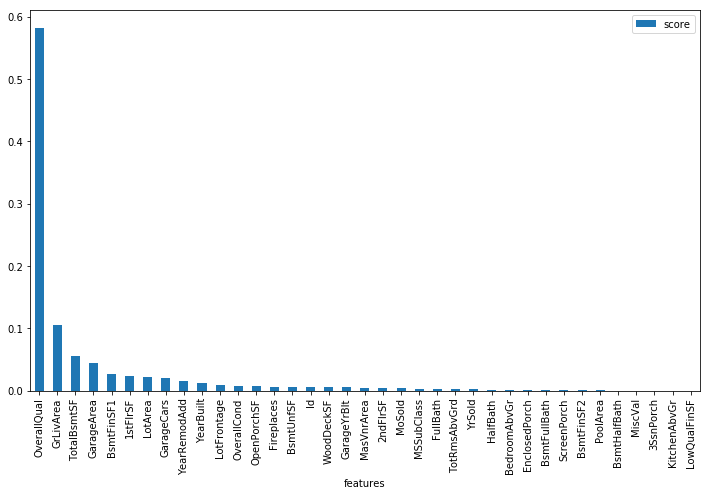

In [73]:
fimp.plot(x='features',y='score',kind='bar',figsize=(12,7))
plt.show()

In [74]:
kp = fimp[fimp.score>0.01]
kp

,features,score
0,OverallQual,0.581327
1,GrLivArea,0.106097
2,TotalBsmtSF,0.056326
3,GarageArea,0.044236
4,BsmtFinSF1,0.026506
5,1stFlrSF,0.024116
6,LotArea,0.021941
7,GarageCars,0.019981
8,YearRemodAdd,0.016297
9,YearBuilt,0.012799


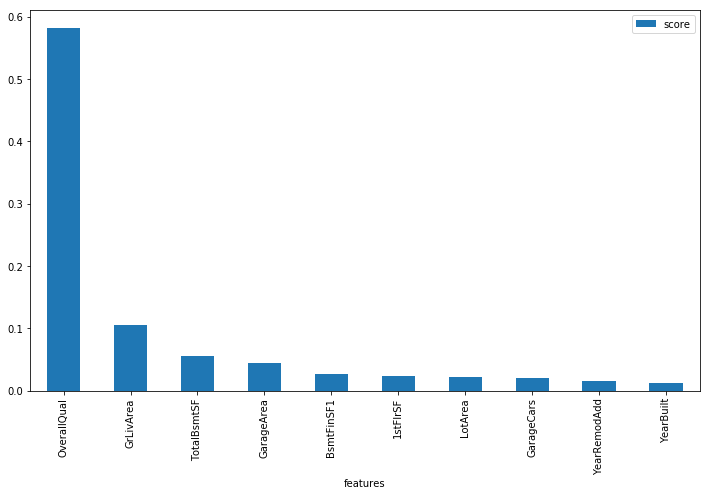

In [75]:
kp.plot(x='features',y='score',kind='bar',figsize=(12,7))
plt.show()

In [76]:
colu = []
for i in kp['features']:
    colu.append(i)

colu

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'GarageCars',
 'YearRemodAdd',
 'YearBuilt']

In [77]:
X_train = X_train[colu].copy()
X_train

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1,1stFlrSF,LotArea,GarageCars,YearRemodAdd,YearBuilt
1025,5,882,882,461,138,882,7700,2,1972,1972
67,7,1479,1453,558,1013,1479,10665,2,2003,2003
1278,8,2031,1128,577,804,1128,9473,2,2002,2002
400,8,1288,1260,500,786,1288,14963,2,1996,1996
32,8,1234,1234,484,0,1234,11049,2,2007,2007
1271,6,1489,1489,462,0,1489,9156,2,1968,1968
561,5,1389,1389,418,1071,1389,10010,2,1975,1974
733,5,1144,864,264,594,1144,10000,1,1983,1961
1016,7,1504,1504,478,690,1504,11883,2,1996,1996
1426,7,2127,1223,525,1000,1223,10944,2,1994,1994


In [78]:
model2 = modelrf.fit(X_train,y_train)
sc2 = cross_val_score(model2, X_train,y_train,cv=kfold,scoring=scoring)
sc2.mean()

0.83666726230825428

In [82]:
X_test = X_test[colu].copy()
X_test

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1,1stFlrSF,LotArea,GarageCars,YearRemodAdd,YearBuilt
480,9,1850,1833,772,1261,1850,16033,3,2005,2004
1412,4,1040,0,420,0,1040,7200,2,1950,1949
1301,6,1494,771,213,547,753,7500,1,1950,1942
982,7,1266,1266,388,0,1266,3182,2,2007,2007
662,6,1392,1392,576,0,1392,13560,2,1968,1968
942,4,1440,1440,0,1440,1440,7711,0,1977,1977
1378,6,987,483,264,309,483,1953,1,1973,1973
667,6,1679,1408,575,1138,1679,8125,2,1998,1994
135,7,1682,1304,530,0,1682,10400,2,1970,1970
1048,5,1771,0,336,0,1771,21750,2,2006,1960


In [95]:
pred = model2.predict(X_test)
pred

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [96]:
sct = cross_val_score(model2,X_test,pred)
sct.mean()

0.93827534983566185